/home/poudell/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


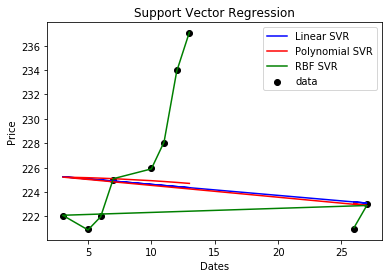

ValueError: X.shape[1] = 2 should be equal to 1, the number of features at training time

In [43]:
import requests
#helps in http request
import json as simplejson
#used or json handling , better than json as it gives specific error code for incompatible json
import re
#used for string operations
import operator
#used for numerical operations
import sys
#used for system calls
import urllib.request
#used to get or push http url requests
import os
#used for instructing os to perform functions on file system
import csv
#handle csv files
import numpy as np
#used for scientific calculation
from sklearn.svm import SVR
#used for ml
import matplotlib.pyplot as matplt
#used for plotting graph
import pandas as pd

from itertools import islice



# #INPUT THE COMPANY NAME
# if(len(sys.argv)<2):
# 	print('invalid string')
# 	exit()

# # query=sys.argv[1]
# #ACCESS THE YAHOO FINANACE URL FOR STOCK CODE
# yahoo_stock_code="http://d.yimg.com/autoc.finance.yahoo.com/autoc?query=ORCL"
# yahoo_excess_code="&region=1&lang=en"
# stock_url=yahoo_stock_code+yahoo_excess_code
# response=requests.get(stock_url)
# # print(response)

# #CONEVRT THE JSON FILE INTO UTF-8 FORMAT FOR PARSING
# data=simplejson.loads(response.content.decode("utf-8"))

#FETCH THE FIRST COMPANY CODE
# code=data['ResultSet']['Result'][0]['symbol']
# print(code)

# #ACCESS THE YAHOO FINANACE API FOR DOWNLOADING THE DATA
# base_url = "http://ichart.finance.yahoo.com/table.csv?s="
# dataset_url=base_url+code
# print(dataset_url)

# #CREATE PATH FOR THE DOWNLOADED FILE
# output_path="C:/ml/stock_prediction/"
# output_path_new=output_path+code+"_new.csv"
# output_path=output_path+code+".csv"
# print(output_path)


# #USE URLLIB FOR THE DATA FILE DOWNLOAD
# try:
# 	urllib.request.urlretrieve(dataset_url,output_path)
# except urllib.request.ContentTooShortError as p:
# 	outfile=open(output_path,"w")
# 	outfile.write(p.content)
# 	outfile.close()
	
data = pd.read_csv('dataset/Upper.csv')

#WRITE THE FIRST i LINES OF DATA INTO A NEW FILE 
# a=open(output_path,"rb")
# b=open(output_path_new,"wb")
# reader=csv.reader(a,delimiter=',')
# f=csv.writer(b)

# i=1
# for line in reader:
# 	if i>20:
# 		break
# 	else:
# 		f.writerow(line)
# 		i=i+1	




# a.close()
# b.close()
# os.remove(output_path)

# #COVERT THE DATA INTO TWO ARRAYS OF DATE AND PRICE

date=[]
price=[]
LIMIT=10
for index, row in islice(data.iterrows(), LIMIT):
# for index , row in data.head(10):
#     print(row['Date'],row['Low'])
    date.append(int(row['Date'].split('/')[2]))
    price.append(float(row['Low']))
# with open(data) as datasource:
# 	r=csv.reader(datasource)
# 	next(r)
# 	for row in r:
# 		date.append(int(row[2].split('/')[2]))
# 		price.append(float(row[6]))

#reshape the date array into the numpy array of nX1
date=np.reshape(date,(len(date),1))
# print(date)
# print(price)



#DATA PREDICTION
#initialise svr, fit the models, predidct the model values
#kernel specifies the kernel type used in algorithm
#C is the error penalty
#gamma is the kernel coefficient
#degree is the polynomial degree in poly kernel



svr_lin=SVR(kernel='linear',C=1e3)
svr_poly=SVR(kernel='poly',C=1e3,degree=2)
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)

# print(svr_lin)
svr_lin.fit(date,price)
svr_poly.fit(date,price)
svr_rbf.fit(date,price)



#PLOT THE DATA ON THE GRAPH

matplt.scatter(date,price,color='black',label='data')
matplt.plot(date,svr_lin.predict(date),color='blue',label='Linear SVR')
matplt.plot(date,svr_poly.predict(date),color='red',label='Polynomial SVR')
matplt.plot(date,svr_rbf.predict(date),color='green',label='RBF SVR')
matplt.xlabel('Dates')
matplt.ylabel('Price')
matplt.title('Support Vector Regression')
matplt.legend()
matplt.show()

# svr_lin=svr_lin.reshape(1,-1)
# svr_poly=svr_poly.reshape(1,-1)
# svr_rbf=svr_rbf.reshape(1,-1)

# svr_lin.predict(10)

svr_lin.predict([[10,1]])
svr_poly.predict([[10,1]])
svr_rbf.predict([[10,1]])



# os.remove(output_path_new)
# print('prediction over')